# C2: HIERARCHIAL CLUSTERING AND DENSITY BASED CLUSTERING

## Hierarchical clustering

**Definition :** A clustering technique that builds a hierarchy of clusters by either merging smaller clusters into larger ones or splitting larger clusters into smaller ones.

### Key concepts:
- **Dendrogram :** A tree diagram showing the sequence of merges or splits.
- **Distance metrics :** Measures the distance between two points, reflecting their similarity.
- **Linkage criteria :** Methods to calculate the distance between clusters.
    - **Single linkage :** Uses the closest points.
    - **Complete linkage :** Uses the farthest points.
    - **Average linkage :** Uses the average distance between points.
    - **Ward's method :** Minimizes variance within clusters.

### Types of hierarchical clustering
1. **Agglomerative (Bottom-up)** 
    - Process :
        1. Start by treating each data point as its own cluster.
        2. Iteratively merge the closest clusters.
    - This is the most commonly used approach.

2. **Divisive (Top-down)**
    - Process :
        1. Start with all data points in a single cluster.
        2. Iteratively split it into smaller clusters.

### Intuition
- Think of a family tree.
- The algorithm builds a hierarchy of clusters instead of a single flat set, either agglomeratively or divisively.

### Advantages
- No need to pre-define the number of clusters.
- Dendrogram provides a clear picture of data grouping.

### Disadvantages
- Computationally expensive $(O(n^2 \log n))$.
- Sensitive to noise and outliers.
- Once clusters are merged or split, the process cannot be reversed.


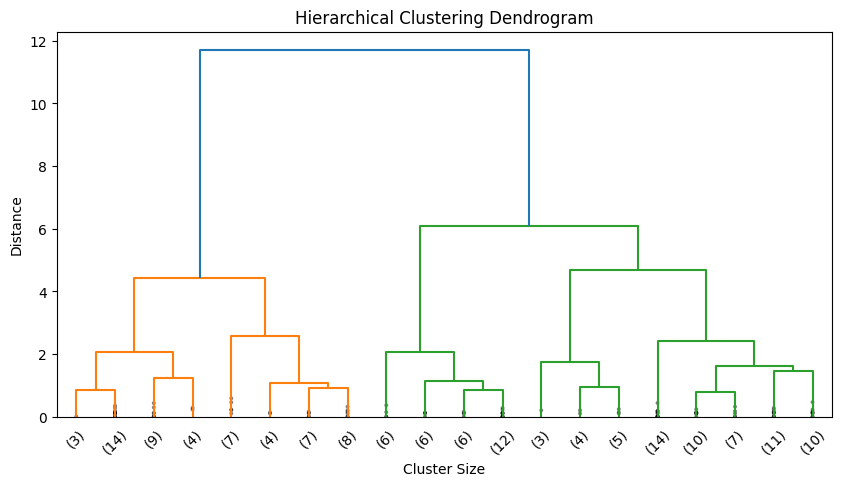

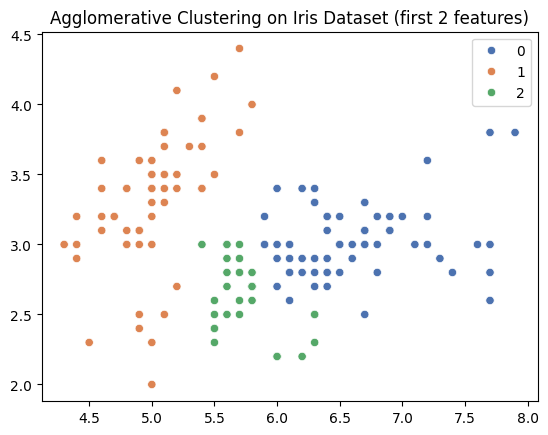

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load Iris dataset (famous dataset: 150 samples, 3 flower species)
iris = load_iris()
X = iris.data[:, :2]  # only take first 2 features for visualization

# Create linkage matrix for dendrogram
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Perform Agglomerative Clustering (newer sklearn versions)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)

# Scatter plot of clusters
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='deep')
plt.title("Agglomerative Clustering on Iris Dataset (first 2 features)")
plt.show()

## Density based clustering

**Definition :** A clustering technique that groups together data points that are closely packed and marks points in low-density regions as outliers/noise.

### Key concepts
- **Density :** Number of points within a specified radius.
- **Core point :** A point with at least the minimum required neighbors within its radius.
- **Border point :** A point that lies within the neighborhood of a core point but doesn’t have enough neighbors to be a core itself.
- **Noise point :** A point that is neither a core nor a border point.

### Intuition
- Imagine a circle of radius $\epsilon$ around each point.
- If the circle contains enough neighbors (MinPts), that point is in a dense area.
- From each core point, you can walk to a cluster and then to its neighbors, gradually building the cluster.
- If a point doesn’t have enough neighbors and isn’t connected to any core, it is treated as an outlier/noise.

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- It is a popular algorithm.
- It works by checking how many neighbors each point has within a given radius.
- **Parameters :**
    1. $\epsilon$ : Radius for neighborhood.
    2. MinPts : Minimum points required to form a dense cluster.
- **Working steps :**
    1. Pick an unvisited point.
    2. If it has greater than or equal to MinPts within $\epsilon$, mark it as a core point and create a cluster.
    3. Expand the cluster by adding all density-reachable points.
    4. If it doesn’t meet the criteria, mark it as noise.
    5. Repeat until all points are visited.

### Advantages
- Finds clusters of arbitrary shapes.
- Can automatically detect outliers.
- Doesn’t require knowing the number of clusters in advance.

### Disadvantages
- Choosing good values for $\epsilon$ and MinPts is tricky.
- Struggles when clusters have very different densities.
- In high-dimensional data, distances become less meaningful.


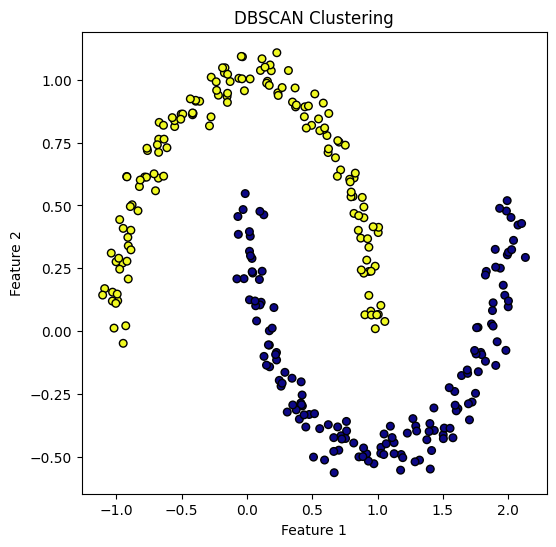

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate crescent-shaped dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Run DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps = radius, min_samples = density threshold
labels = dbscan.fit_predict(X)

# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma", s=30, edgecolors='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
